In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

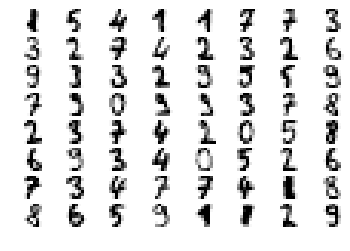

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])
y = digits.target

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [7]:
numbers = [0, 1, 2, 3] # number 2 > number 1
number_of_classification = len(numbers)
number_of_sampling = 100

list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li[:number_of_sampling])

samplesize = X[digits_indexes].shape[0]
x_inputs =[tuple(c) for c in X[digits_indexes].tolist()]
x_outputs = [tuple(c) for c in y[digits_indexes].reshape(samplesize,1).tolist()]

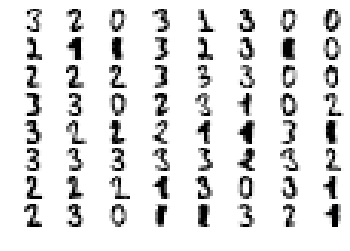

In [8]:
from random import randint
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(np.array(x_inputs[randint(0, samplesize)]).reshape(8,8), cmap='Greys')
plt.show()

In [9]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        outputs = []
        for xi in x_inputs:
            output = net.activate(xi)
            outputs.append(output)
        
        
        px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
        # the index of maximum in each line
        pred_outputs = np.argmax(px_outputs, axis = 1)
        # replace index to real number, from higher number to lower number!!
        for i in range(number_of_classification):
            index = number_of_classification - i - 1
            pred_outputs[pred_outputs==index] = numbers[index]
        
        real_outputs = np.array(x_outputs).reshape(samplesize,)
        
        acc = np.sum(pred_outputs == real_outputs)/samplesize

        genome.fitness = acc

def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(False)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    #checkpointer = neat.Checkpointer(100)
    #p.add_reporter(checkpointer)
    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 100)

    return [stats, winner]


samplesize = len(x_outputs)

local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist4")
[stats, winner] = run(config_path)

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)


 ****** Running generation 0 ****** 

Population's average fitness: 0.25879 stdev: 0.09583
Best fitness: 0.52750 - size: (4, 26) - species 2 - id 26
Average adjusted fitness: 0.221
Mean genetic distance 2.807, standard deviation 0.380
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 1.946 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.29599 stdev: 0.10953
Best fitness: 0.56250 - size: (4, 26) - species 25 - id 378
Average adjusted fitness: 0.280
Mean genetic distance 2.939, standard deviation 0.404
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 2.052 sec (1.999 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.31937 stdev: 0.11216
Best fitness: 0.64500 - size: (6, 30) - species 2 - id 528
Average adjusted fitness: 0.257
Mean genetic distance 3.009, standard deviation 0.424
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 3.958 sec (2.652 av

Population's average fitness: 0.44229 stdev: 0.13593
Best fitness: 0.72250 - size: (7, 33) - species 2 - id 2246
Average adjusted fitness: 0.421
Mean genetic distance 3.160, standard deviation 0.457
Population of 190 members in 29 species
Total extinctions: 0
Generation time: 2.580 sec (3.229 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.44478 stdev: 0.13480
Best fitness: 0.72250 - size: (7, 33) - species 2 - id 2246
Average adjusted fitness: 0.313
Mean genetic distance 3.159, standard deviation 0.474
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 3.402 sec (3.109 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.45026 stdev: 0.12979
Best fitness: 0.72250 - size: (7, 33) - species 2 - id 2246
Average adjusted fitness: 0.325
Mean genetic distance 3.133, standard deviation 0.472
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 2.775 sec (2.807 average)

 ****** Ru

Population's average fitness: 0.47487 stdev: 0.15071
Best fitness: 0.79000 - size: (10, 34) - species 38 - id 6751
Average adjusted fitness: 0.341
Mean genetic distance 3.216, standard deviation 0.519
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 2.788 sec (2.752 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.45769 stdev: 0.16194
Best fitness: 0.79000 - size: (10, 34) - species 38 - id 6751
Average adjusted fitness: 0.423
Mean genetic distance 3.188, standard deviation 0.534
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 2.823 sec (2.773 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.45912 stdev: 0.15765
Best fitness: 0.84000 - size: (10, 33) - species 42 - id 7379
Average adjusted fitness: 0.378
Mean genetic distance 3.169, standard deviation 0.543
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 2.727 sec (2.777 average)

 ***

Population's average fitness: 0.49550 stdev: 0.16067
Best fitness: 0.87500 - size: (11, 34) - species 42 - id 9271
Average adjusted fitness: 0.398
Mean genetic distance 3.058, standard deviation 0.595
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 2.836 sec (2.854 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.49637 stdev: 0.16768
Best fitness: 0.87500 - size: (11, 34) - species 42 - id 9271
Average adjusted fitness: 0.350
Mean genetic distance 3.092, standard deviation 0.596
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 3.075 sec (2.895 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.49243 stdev: 0.16447
Best fitness: 0.87500 - size: (11, 34) - species 42 - id 9271
Average adjusted fitness: 0.328
Mean genetic distance 3.029, standard deviation 0.620
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 3.008 sec (2.918 average)

 ***

Population's average fitness: 0.52194 stdev: 0.18303
Best fitness: 0.87500 - size: (11, 34) - species 42 - id 9271
Average adjusted fitness: 0.318
Mean genetic distance 2.840, standard deviation 0.535
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 3.078 sec (3.127 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.53213 stdev: 0.17667
Best fitness: 0.87500 - size: (11, 34) - species 42 - id 9271
Average adjusted fitness: 0.403
Mean genetic distance 2.831, standard deviation 0.529
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 3.209 sec (3.141 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.49209 stdev: 0.17322
Best fitness: 0.87500 - size: (11, 34) - species 42 - id 9271
Average adjusted fitness: 0.334
Mean genetic distance 2.856, standard deviation 0.558
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 3.055 sec (3.140 average)

 ****

In [10]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [11]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [22, 4, 4]


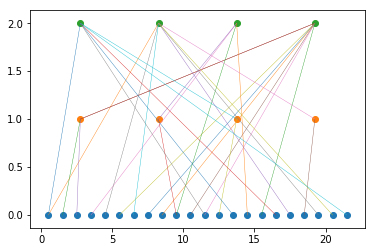

In [12]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [ ]:
visualize.draw_net(config, winner, prune_unused=False)
visualize.plot_stats(stats, ylog=False, view=False)
visualize.plot_species(stats, view=False)